## Final Assignment


Before working on this assignment please read the instructions fully. Use blackboard to submit a link to your repository. Upload a rendered document (html/pdf) as well as the original code. Please familiarize yourself with the criteria before beginning the assignment.

You should define a research question yourself based on at least two data sources that can be merged into a tidy dataset. The research question should be life science related. The research question should be a question with a causual nature. For instance questions like: How do independent variables X influence the dependent variable of Y? The research question should be answered with an interactive visual, and if possible tested for significance.
If you use code snippets from others you should refer to the original author, otherwise you will be accused of plagiarism. Please be prepared to explain your code in a verbal exam. 



Assessment criteria

Conditional
- No data and or api-key information is stored in the repository. 
- No hard datapaths are used, datapaths are provided in a configfile.
- At least two data sets are merged into one tidy dataframe.

Graded
- (5 pt) The research question is stated. 
- (5 pt) Links to sources are provided and a small description about the data
- (20 pt) Data qualitity and data quantity are inspected and reported. Appropiate transformations are applied.
- (20 pt) Assumptions and presuppositions are made explicit (chosen data storage method, chosen analysis method, chosen design). An argumentative approach is used explaining steps, taken into account data quality and quantity. Explanation is provided either with comments in the code or in a seperate document.
- (10 pt) Interactive visualization is extracted from correct analysis of (incomplete) data
- (10 pt) The design supports the research question. The data is informative in relation to the topic. Visualization is functional and attractive Figures contain X and Y labels, title and captions. (10)
- (20 pt) Code is efficient coded, according to coding style without code smells and easy to read. Code is demonstrated robust and flexible 
- (10 pt) All the code is stored in repository with Readme including most relevant information to implement the code. used software is suitably licensed and documented


### About the data

You can either choose 
- a dataset combination provided on blackboard
- two datasets on the web from two different sources which can be used to answer a research question
- the data from your project

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with others, so choose appropriate datasets. You are welcome to use datasets of your own as well, but minimual two datasets should be coming from the web and or API's. 

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations in your visualization. 

### Instructions:

Define a research question, select data and code your data acquisition, data processing, data analysis and visualization. Use a repository with a commit strategy and write a readme file. Make sure that you document your choices. 

In [1]:
import MainFunctions as mf
import DataVisualisation as dv
import plotly.graph_objects as go
from ipywidgets import Dropdown, VBox
import pandas as pd
import DataStatistics as st

#read datasources and clean its data
dfEducation = mf.readCleanData(True)
dfIncome = mf.readCleanData(False)

#visulaze the data before analyse them based on their country
dv.interactiveMap(dfEducation, "2008").show()
dv.interactiveMap(dfIncome, "2008").show()



In [2]:
isNormalEdu, dfEducation = mf.hormonizeData(dfEducation, True)
isNormalIncom, dfIncome = mf.hormonizeData(dfIncome, False)

print("Education Data normal test result is : {0}".format(isNormalEdu))
print("Income Data normal test result is : {0}".format(isNormalIncom))

Education Data normal test result is : False
Income Data normal test result is : False


In [3]:
#merge datasets and check relation between education and income
df = pd.merge(dfEducation, dfIncome, on = ["isced11","levels","country"])

isNormal = st.isNormalDataFrame(df, 3, 4)

print("the result of normalization of data is : {0} ".format(isNormal))



the result of normalization of data is : False 


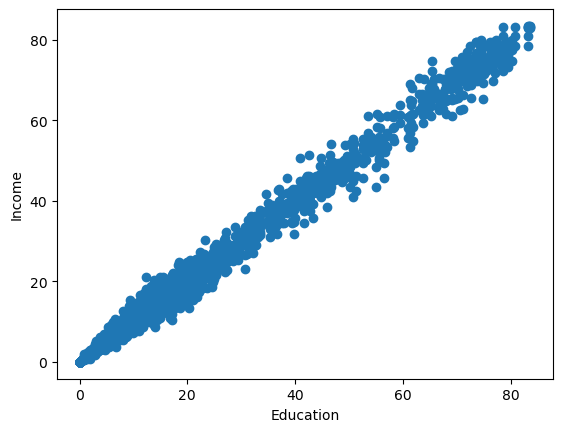

the relation between data is positive


In [4]:
#since in previouse step data were not normal then plot them by plot-scatter and check relation between them by coeffection
dv.plotOnScat(df["centralPointEdu"], "Education", df["centralPointInCom"], "Income").show()

print(st.getCorrelation(df["centralPointEdu"], df["centralPointInCom"]))